In [12]:
import pandas as pd
import numpy as np
import seaborn as snsx
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [4]:
dataset=pd.read_csv('/Users/mithunkumar/Desktop/diabetes.csv')

In [5]:
print(len(dataset))

768


In [6]:
print(dataset.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [7]:
#Replacing zeroes

zero_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

for column in zero_not_accepted:
    dataset[column] = dataset[column].replace(0, np.NaN)
    mean = int(dataset[column].mean(skipna=True))
    dataset[column] = dataset[column].replace(np.NaN, mean)

In [11]:
#Split dataset

X = dataset.iloc[:,0:8]
y = dataset.iloc[:,8]



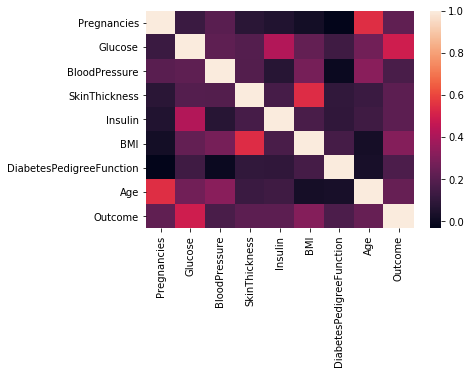

In [13]:
import seaborn as sns

sns.heatmap(dataset.corr())

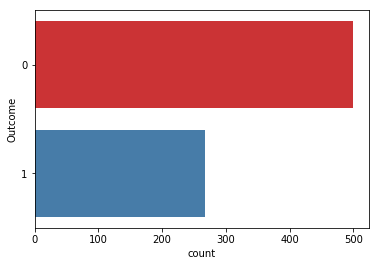

In [14]:
#lets count total outcome in each target 0 1
#0 means no diabetes
#1 means patient with diabtes
sns.countplot(y=dataset['Outcome'],palette='Set1')

/opt/anaconda2/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/anaconda2/lib/python2.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


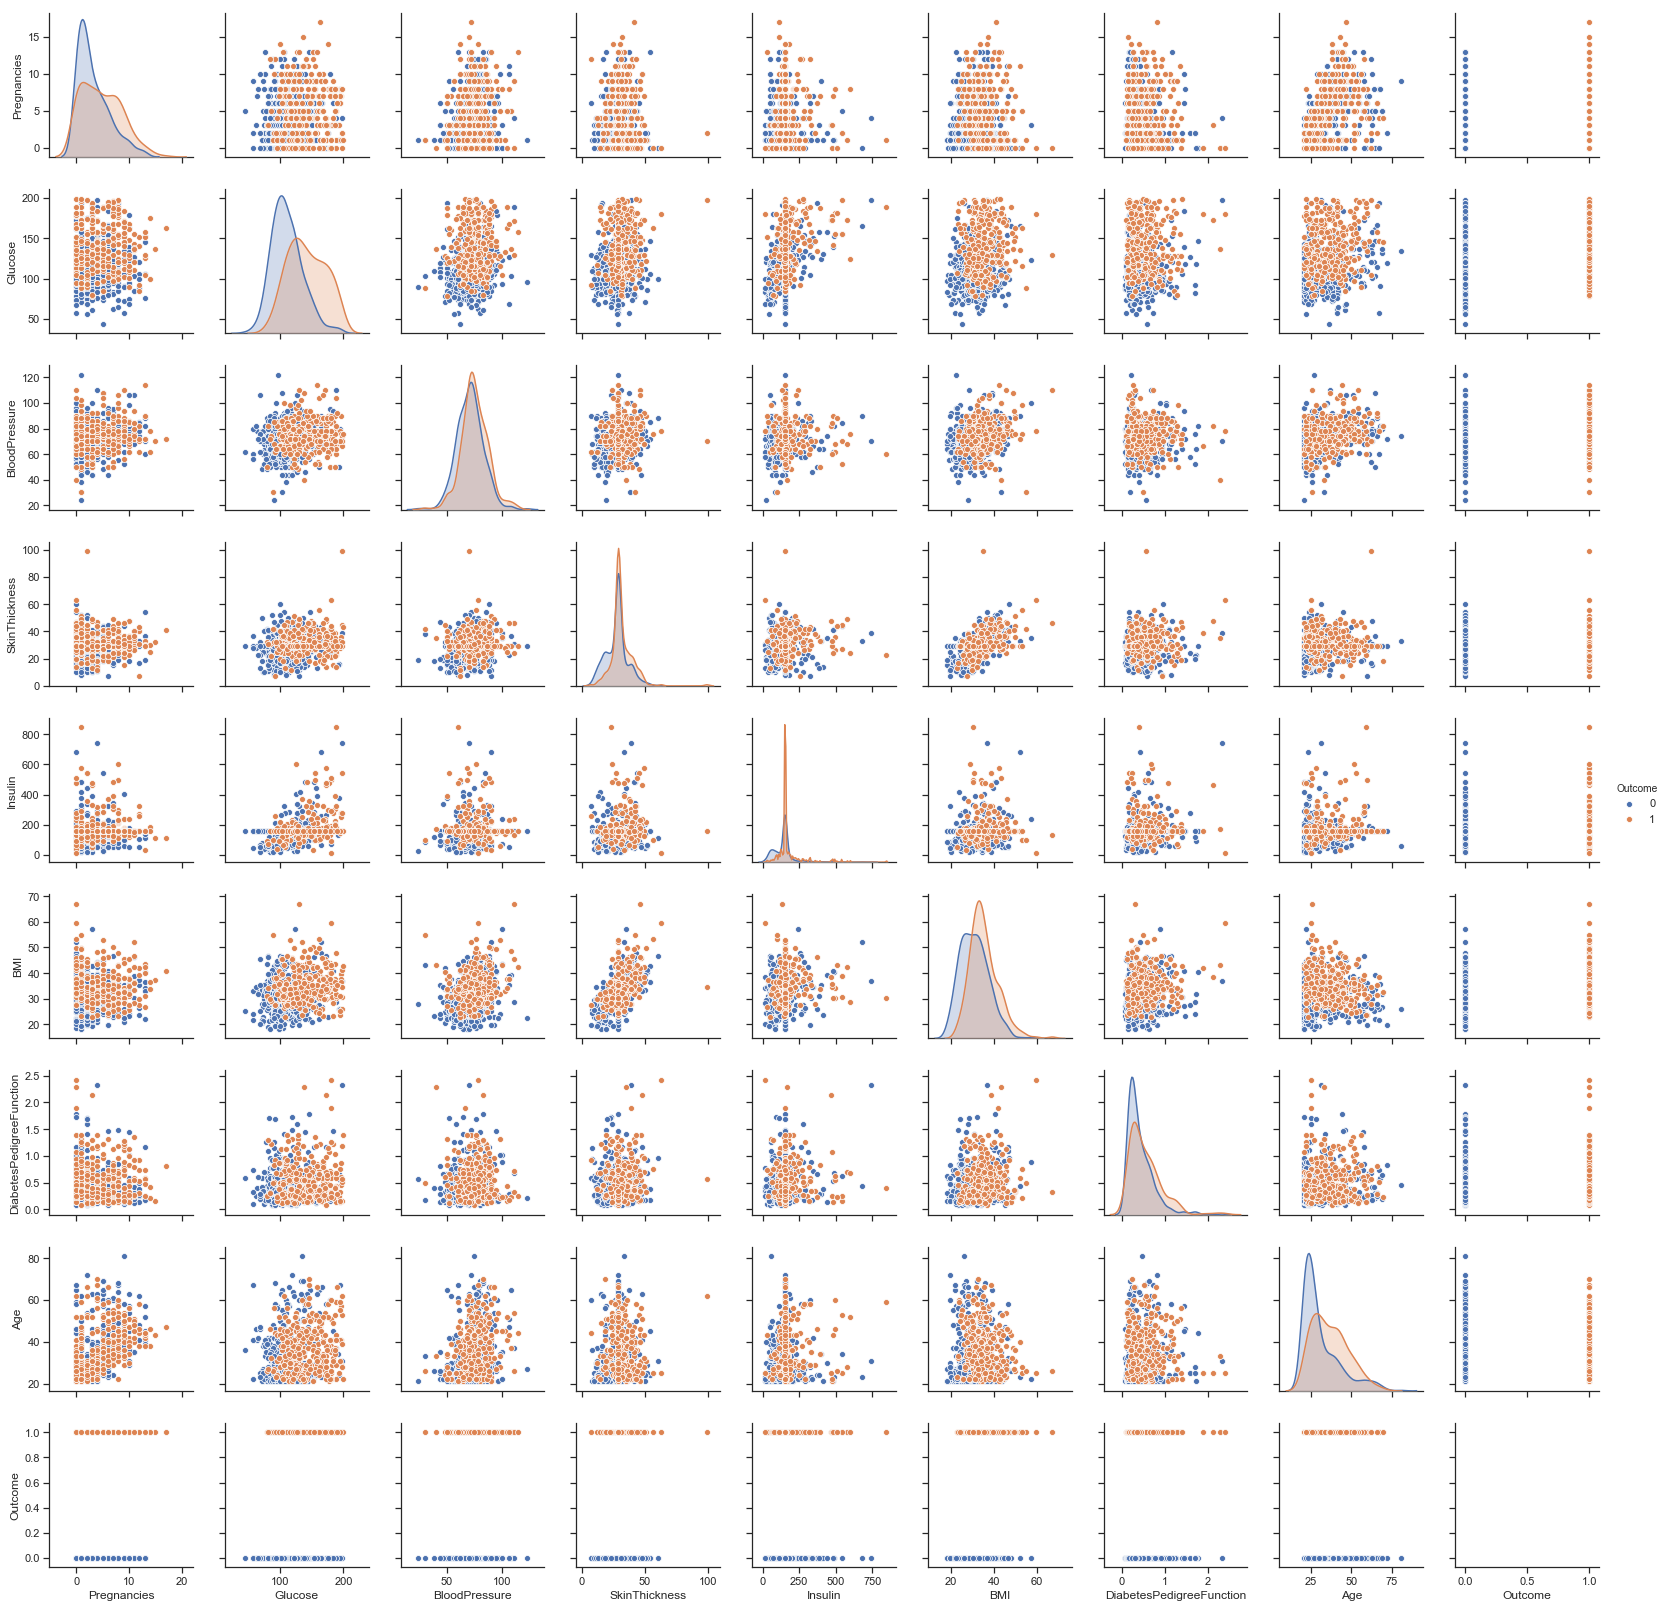

In [15]:
sns.set(style="ticks")
sns.pairplot(dataset, hue="Outcome")

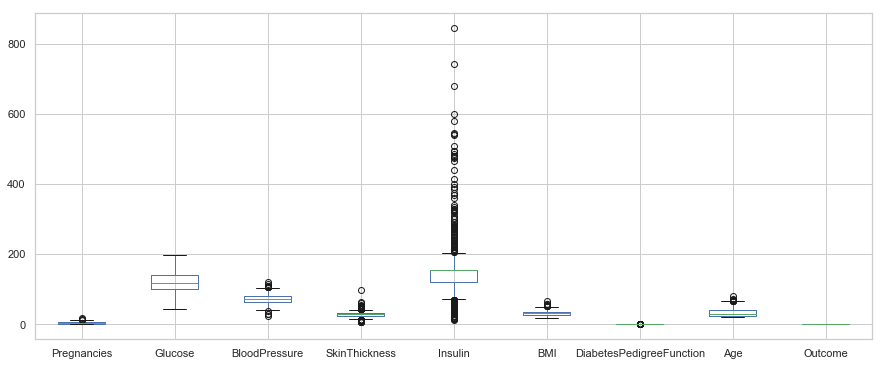

In [16]:
#box plot for outlier visualization
sns.set(style="whitegrid")
dataset.boxplot(figsize=(15,6))

NameError: name 'plt' is not defined

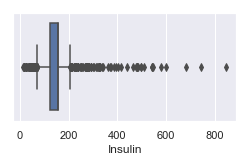

In [17]:
#box plot
sns.set(style="whitegrid")

sns.set(rc={'figure.figsize':(4,2)})
sns.boxplot(x=dataset['Insulin'])
plt.show()
sns.boxplot(x=dataset['BloodPressure'])
plt.show()
sns.boxplot(x=dataset['DiabetesPedigreeFunction'])
plt.show()

In [18]:
#outlier remove

Q1=dataset.quantile(0.25)
Q3=dataset.quantile(0.75)
IQR=Q3-Q1

print("---Q1--- \n",Q1)
print("\n---Q3--- \n",Q3)
print("\n---IQR---\n",IQR)

#print((df < (Q1 - 1.5 * IQR))|(df > (Q3 + 1.5 * IQR)))

('---Q1--- \n', Pregnancies                   1.00000
Glucose                      99.75000
BloodPressure                64.00000
SkinThickness                25.00000
Insulin                     121.50000
BMI                          27.50000
DiabetesPedigreeFunction      0.24375
Age                          24.00000
Outcome                       0.00000
Name: 0.25, dtype: float64)
('\n---Q3--- \n', Pregnancies                   6.00000
Glucose                     140.25000
BloodPressure                80.00000
SkinThickness                32.00000
Insulin                     155.00000
BMI                          36.60000
DiabetesPedigreeFunction      0.62625
Age                          41.00000
Outcome                       1.00000
Name: 0.75, dtype: float64)
('\n---IQR---\n', Pregnancies                  5.0000
Glucose                     40.5000
BloodPressure               16.0000
SkinThickness                7.0000
Insulin                     33.5000
BMI                         

In [19]:

#outlier remove
dataset_out = dataset[~((dataset < (Q1 - 1.5 * IQR)) |(dataset > (Q3 + 1.5 * IQR))).any(axis=1)]
dataset.shape,dataset_out.shape

((768, 9), (511, 9))

NameError: name 'plt' is not defined

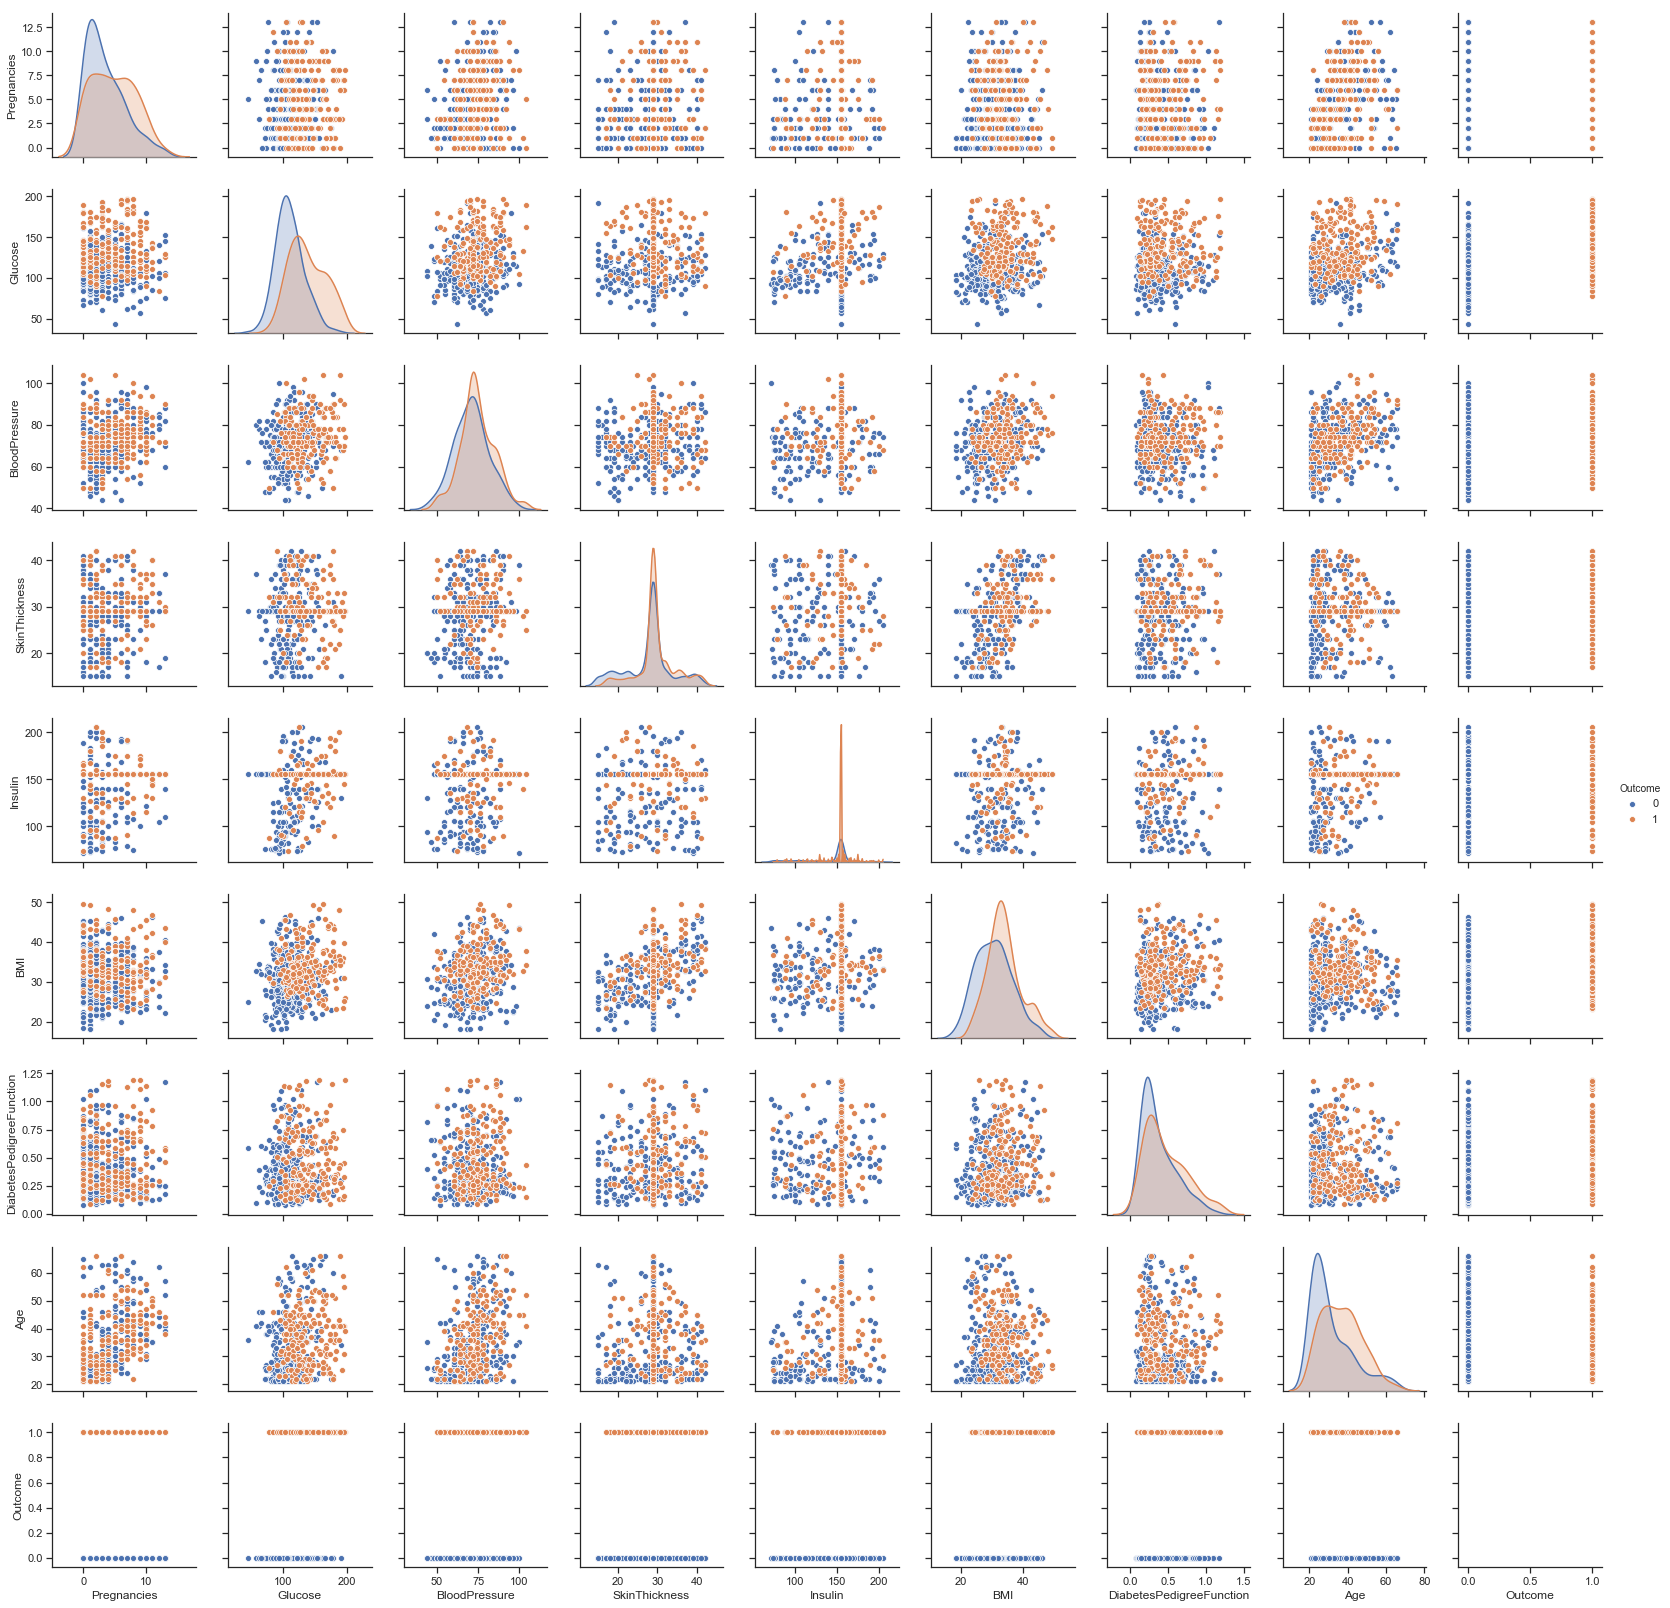

In [20]:
#Scatter matrix after removing outlier
sns.set(style="ticks")
sns.pairplot(dataset_out, hue="Outcome")
plt.show()

In [22]:
#lets extract features and targets
X=dataset_out.drop(columns=['Outcome'])
y=dataset_out['Outcome']

In [23]:
#Splitting train test data 80 20 ratio
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2)
train_X.shape,test_X.shape,train_y.shape,test_y.shape

((408, 8), (103, 8), (408,), (103,))

In [35]:
# KNN Classifier

clf=KNeighborsClassifier(n_neighbors=10)
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)

In [36]:
from sklearn.metrics import confusion_matrix,accuracy_score,make_scorer
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_auc_score

def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]

#cross validation purpose
scoring = {'accuracy': make_scorer(accuracy_score),'prec': 'precision'}
scoring = {'tp': make_scorer(tp), 'tn': make_scorer(tn),
           'fp': make_scorer(fp), 'fn': make_scorer(fn)}

def display_result(result):
    print("TP: ",result['test_tp'])
    print("TN: ",result['test_tn'])
    print("FN: ",result['test_fn'])
    print("FP: ",result['test_fp'])
    
    
acc=[]
roc=[]

In [37]:
#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))


Accuracy 0.68932038835 ROC 0.647595356551


In [38]:
#cross val score
result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)

('TP: ', array([ 8,  8,  7,  8,  3,  9, 10,  6,  7,  4]))
('TN: ', array([24, 20, 23, 23, 24, 26, 22, 18, 21, 24]))
('FN: ', array([ 7,  7,  8,  6, 11,  5,  4,  8,  7, 10]))
('FP: ', array([3, 7, 4, 4, 3, 0, 4, 8, 5, 2]))
